# Reconocimiento de dígitos con KNN



Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [66]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc - works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ - works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/jazzer/.pyenv/versions/3.6.5/bin/python (found version "3.6.5") 
-- Found PythonLibs: /home/jazzer/.pyenv/versions/3.6.5/lib/libpython3.6m.a
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/jazzer/Facultad/metodos_numericos/mt/tp2
-- Co

In [58]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum


/home/jazzer/Facultad/metodos_numericos/mt/tp2/notebooks
Python 3.6.5


## Explorando los datos

In [3]:
import numpy as np
import metnum as mt

A=np.diag(range(10, 0, -1))

##eigen, v = metnum.power_iteration(A,10000,0.0000000002 )
##eigen,v.round()

eigenvalues, eigenvectors = metnum.get_first_eigenvalues(A,10, 1000000, 1e-7)

eigenvalues.round(), eigenvectors.round()


(array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.]),
 array([[-1.,  0., -0.,  0., -0., -0., -0., -0.,  0.,  0.],
        [ 0.,  1.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.],
        [-0., -0.,  1., -0.,  0.,  0.,  0.,  0., -0., -0.],
        [ 0., -0.,  0.,  1., -0., -0., -0., -0.,  0., -0.],
        [-0., -0.,  0., -0., -1.,  0.,  0.,  0., -0.,  0.],
        [ 0.,  0., -0.,  0.,  0.,  1.,  0.,  0., -0., -0.],
        [ 0.,  0.,  0., -0.,  0., -0.,  1.,  0., -0., -0.],
        [ 0.,  0., -0., -0., -0.,  0.,  0., -1.,  0.,  0.],
        [ 0.,  0., -0.,  0., -0., -0., -0., -0., -1., -0.],
        [ 0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0., -1.]]))

In [59]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_train = pd.read_csv("../data/train.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import metnum as mt
import numpy as np

mt.power_iteration(np.matrix(df_train),1000,1e-10)

(27323.90402915719,
 array([0.00288995, 0.00778124, 0.00239368, ..., 0.00572362, 0.00465386,
        0.00324476]))

Es un csv, con columnas por cada pixel

In [39]:
df_train[:100]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

In [60]:
df_train = df_train[0:100]

En el primer caracter está el dígito a reconocer. Llamamos a esto `y_train`

In [61]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((100, 784), (100, 1))

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

Supuestamente es un 5


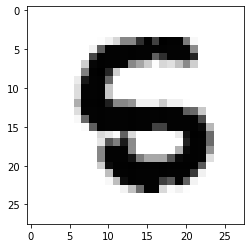

In [42]:
import matplotlib.pyplot as plt

num = 19

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")


### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [52]:
df_train["label"].value_counts(normalize=True)

1    0.16
9    0.14
4    0.11
3    0.11
2    0.11
6    0.09
0    0.09
7    0.07
8    0.06
5    0.06
Name: label, dtype: float64

No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

### Conjunto de development

In [62]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]



assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
X_train.shape, y_train.shape


Ahora tengo 80 instancias de entrenamiento y 20 de validación


((80, 784), (80, 1))

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# Acá pueden cambiar el clasificador nuestro por el de sklearn!

clf = metnum.KNNClassifier(100)
#clf = KNeighborsClassifier(100)

clf.fit(X_train, y_train)


[0. 0. 0. 0. 0.]
CPU times: user 3.64 s, sys: 28 ms, total: 3.67 s
Wall time: 3.66 s


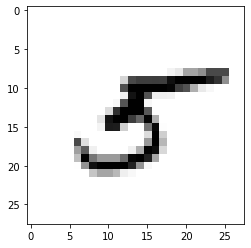

In [65]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val[0:5])
#acc = accuracy_score(y_val, y_pred)
#print("Accuracy: {}".format(acc))
print(y_pred)

img = X_val[0].reshape(28, 28)
plt.imshow(img, cmap="Greys")

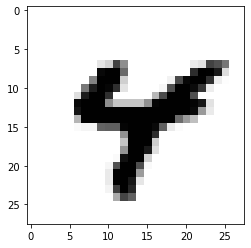

In [32]:
img = X_val[0].reshape(28, 28)
plt.imshow(img, cmap="Greys")

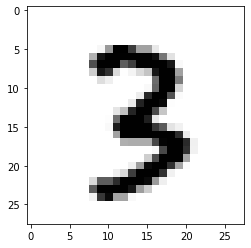

In [34]:
img1 = X_val[1].reshape(28, 28)
plt.imshow(img1, cmap="Greys")

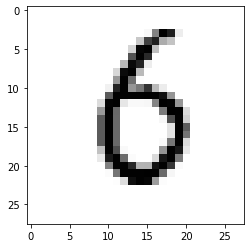

In [37]:
img2 = X_val[2].reshape(28, 28)
plt.imshow(img2, cmap="Greys")

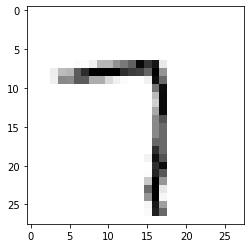

In [36]:
img3 = X_val[3].reshape(28, 28)
plt.imshow(img3, cmap="Greys")

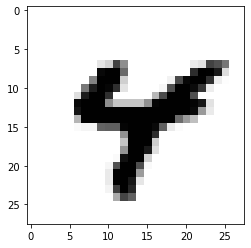

In [35]:
img4 = X_val[4].reshape(28, 28)
plt.imshow(img4, cmap="Greys")